In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"C:\Users\shree\Downloads\tested.csv")
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12,Unnamed: 13
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,NaN
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,NaN
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,NaN
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,NaN


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Unnamed: 12    418
Unnamed: 13    418
dtype: int64

In [5]:
df = df.drop(columns=["Unnamed: 12", "Unnamed: 13"], errors='ignore')

In [6]:
df.drop("Cabin", axis=1, inplace=True)

In [9]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [10]:
df.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)


In [11]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})


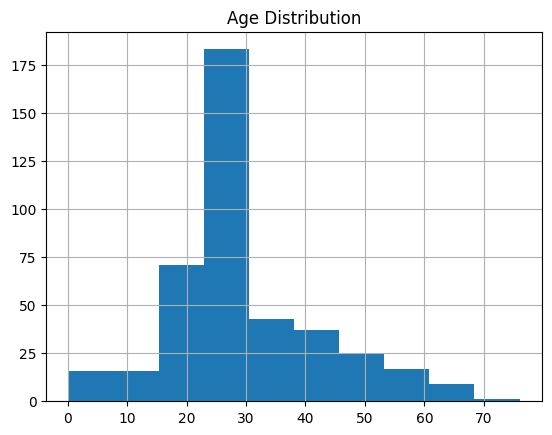

In [29]:
import matplotlib.pyplot as plt

df["Age"].hist()
plt.title("Age Distribution")
plt.show()


EDA

<Axes: >

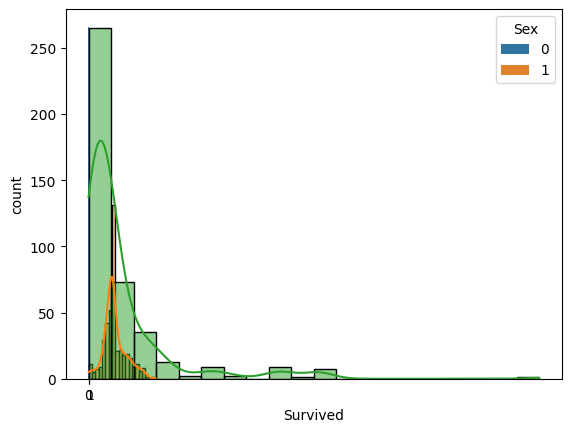

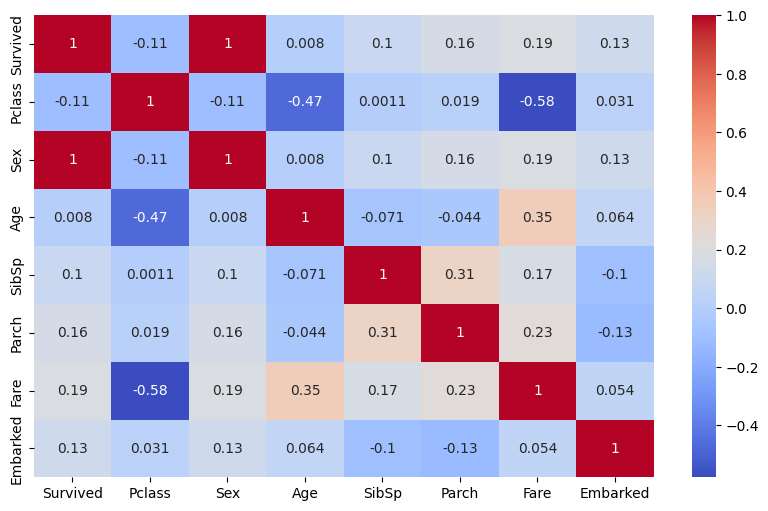

In [12]:

sns.countplot(x="Survived", data=df)
sns.countplot(x="Survived", hue="Sex", data=df)
sns.histplot(df["Age"], bins=20, kde=True)
sns.histplot(df["Fare"], bins=20, kde=True)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [ ]:
df.to_csv("cleaned_titanic.csv", index=False)


In [68]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500,0
414,1,1,39.0,0,0,108.9000,1
415,3,0,38.5,0,0,7.2500,0
416,3,0,27.0,0,0,8.0500,0


In [20]:
print("Missing values in features:")
print(X.isnull().sum())


Missing values in features:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64


In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [22]:
X["Fare"] = X["Fare"].fillna(X["Fare"].median())


In [33]:

X = df.drop("Survived", axis=1)
y = df["Survived"]

X["Fare"] = X["Fare"].fillna(X["Fare"].median())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logreg))
print("\n  Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))



Logistic Regression Accuracy: 1.0

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


  Random Forest Accuracy: 1.0

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [65]:
def predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked):
    import pandas as pd

    input_data = pd.DataFrame([{
        'Pclass': Pclass,
        'Sex': Sex,
        'Age': Age,
        'SibSp': SibSp,
        'Parch': Parch,
        'Fare': Fare,
        'Embarked': Embarked
    }])

    input_data['Sex'] = input_data['Sex'].fillna('male')
    input_data['Embarked'] = input_data['Embarked'].fillna('S')
    input_data['Age'] = input_data['Age'].fillna(28.0)
    input_data['Fare'] = input_data['Fare'].fillna(32.2)

    
    input_data['Sex'] = input_data['Sex'].map({'male': 0, 'female': 1})
    input_data['Embarked'] = input_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    
    input_data = input_data.fillna(0)

   
    prediction = logreg.predict(input_data)
    result = "Survived" if prediction[0] == 1 else " Not Survive"
    print("Prediction:", result)


In [62]:
predict_survival(Pclass=3, Sex='female', Age=25, SibSp=0, Parch=0, Fare=7.25, Embarked='S')


Prediction: Survived


In [63]:
predict_survival(Pclass=3, Sex='male', Age=75, SibSp=0, Parch=0, Fare=8.25, Embarked='Q')


Prediction:  Not Survive
